In [1]:
# ---
# date: 2023-07-25
# title: Multilingual
# draft: true

## Sentence Transformers, Multi-Lingual Models

https://www.sbert.net/docs/pretrained_models.html#multi-lingual-models

In [2]:
%env TOKENIZERS_PARALLELISM=true
%pip install -q pandas numpy sentence-transformers scikit-learn

env: TOKENIZERS_PARALLELISM=true
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sentence_transformers import SentenceTransformer

# MODEL_ID="LaBSE"
MODEL_ID="paraphrase-multilingual-MiniLM-L12-v2"
# MODEL_ID="paraphrase-multilingual-mpnet-base-v2"
# MODEL_ID="distiluse-base-multilingual-cased-v2"


model = SentenceTransformer(MODEL_ID)
print(f"Using model [{MODEL_ID}] with {model.get_sentence_embedding_dimension()} dimensions")

Using model [paraphrase-multilingual-MiniLM-L12-v2] with 384 dimensions


In [4]:
data = {
    "en": [
        "A dog is barking at the moon",
        "My favorite book is 'Deep Sleep' by Raymond Chandler",
        "The chemical formula for caffeine is C₈H₁₀N₄O₂"
    ],
    "de": [
        "Ein Hund bellt den Mond an",
        "Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler",
        "Die chemische Formel für Koffein ist C₈H₁₀N₄O₂"
    ],
    "es": [
        "Un perro está ladrando a la luna",
        "Mi libro favorito es 'El sueño eterno' de Raymond Chandler",
        "La fórmula química de la cafeína es C₈H₁₀N₄O₂"
    ],
    "cs": [
        "Pes štěká na měsíc",
        "Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera",
        "Chemický vzorec pro kofein je C₈H₁₀N₄O₂"
    ],
    "el": [
        "Ένας σκύλος γαβγίζει στο φεγγάρι",
        "Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ",
        "Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂"
    ]
}

In [5]:
import pandas as pd

df = pd.DataFrame.from_dict(data)
df

,en,de,es,cs,el
0,A dog is barking at the moon,Ein Hund bellt den Mond an,Un perro está ladrando a la luna,Pes štěká na měsíc,Ένας σκύλος γαβγίζει στο φεγγάρι
1,My favorite book is 'Deep Sleep' by Raymond Ch...,Mein Lieblingsbuch ist 'Tiefer Schlaf' von Ray...,Mi libro favorito es 'El sueño eterno' de Raym...,Mou oblíbenou knihou je 'Hluboký spánek' od Ra...,Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπ...
2,The chemical formula for caffeine is C₈H₁₀N₄O₂,Die chemische Formel für Koffein ist C₈H₁₀N₄O₂,La fórmula química de la cafeína es C₈H₁₀N₄O₂,Chemický vzorec pro kofein je C₈H₁₀N₄O₂,Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂


In [6]:
df = df.melt(var_name="language", value_name="text")
df

,language,text
0,en,A dog is barking at the moon
1,en,My favorite book is 'Deep Sleep' by Raymond Ch...
2,en,The chemical formula for caffeine is C₈H₁₀N₄O₂
3,de,Ein Hund bellt den Mond an
4,de,Mein Lieblingsbuch ist 'Tiefer Schlaf' von Ray...
5,de,Die chemische Formel für Koffein ist C₈H₁₀N₄O₂
6,es,Un perro está ladrando a la luna
7,es,Mi libro favorito es 'El sueño eterno' de Raym...
8,es,La fórmula química de la cafeína es C₈H₁₀N₄O₂
9,cs,Pes štěká na měsíc


In [7]:
df["embeddings"] = [model.encode(text) for text in df["text"]]
df

,language,text,embeddings
0,en,A dog is barking at the moon,"[0.3451136, 0.062475845, -0.0786392, 0.1543246..."
1,en,My favorite book is 'Deep Sleep' by Raymond Ch...,"[-0.031747214, -0.2972191, -0.376478, 0.199245..."
2,en,The chemical formula for caffeine is C₈H₁₀N₄O₂,"[-0.46651548, -0.26017767, -0.03536741, 0.2843..."
3,de,Ein Hund bellt den Mond an,"[0.18477613, -0.0112174535, -0.11893712, 0.065..."
4,de,Mein Lieblingsbuch ist 'Tiefer Schlaf' von Ray...,"[0.03710158, -0.3229199, -0.37368643, 0.169372..."
5,de,Die chemische Formel für Koffein ist C₈H₁₀N₄O₂,"[-0.47485924, -0.16222021, 0.06902091, 0.16629..."
6,es,Un perro está ladrando a la luna,"[0.19055057, -0.08549184, -0.14936608, 0.09694..."
7,es,Mi libro favorito es 'El sueño eterno' de Raym...,"[0.08565654, -0.20662265, -0.4002841, 0.162628..."
8,es,La fórmula química de la cafeína es C₈H₁₀N₄O₂,"[-0.37891734, -0.142534, 0.07806137, 0.2605178..."
9,cs,Pes štěká na měsíc,"[0.29444534, -0.04903936, -0.11499013, 0.15863..."


In [8]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

nn = NearestNeighbors(n_neighbors=len(df["embeddings"]))

# Normalize distances into range [0..1]
scaler = MinMaxScaler()

nn.fit(df["embeddings"].tolist())

def search(query):
    query_embedding = np.array([model.encode(query)])
    distances, indices = nn.kneighbors(query_embedding)
    normalized_distances = scaler.fit_transform(distances.reshape(-1, 1))

    return pd.DataFrame(
        {
            "text": [df["text"][i] for i in indices.flatten()],
            "distance": normalized_distances.flatten(),
        }
    )

def show_distances(query):
    results = search(query)

    display(
        results
        .style
        .set_table_styles([dict(selector="th,td", props=[("text-align", "left")])])
        .hide(axis="index")
        .format({"distance": "{:.3f}"})
        .background_gradient(subset=["distance"], cmap="Greys")
    )

    data = results.reset_index()

    chart = data.plot.scatter(x="index", y="distance")
    chart = data.plot(x='index', y='distance', ax=chart, kind='line', color='grey', alpha=0.5, label=None)
    chart.legend([])
    chart.set_ylabel("Distance")
    chart.set_xlabel("Index")
    chart

text,distance
A dog is barking at the moon,0.000
Pes štěká na měsíc,0.221
Ein Hund bellt den Mond an,0.250
Ένας σκύλος γαβγίζει στο φεγγάρι,0.252
Un perro está ladrando a la luna,0.293
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.802
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.826
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.859
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.869
My favorite book is 'Deep Sleep' by Raymond Chandler,0.926


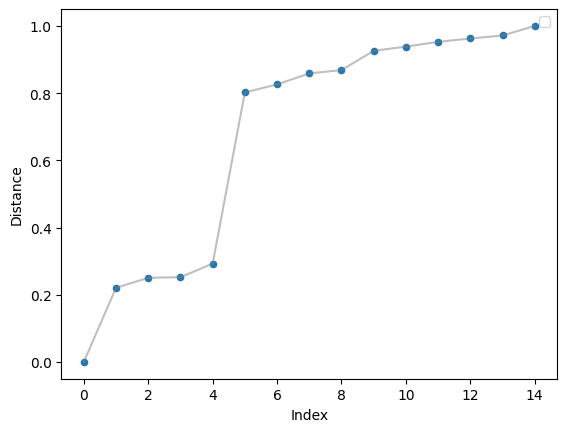

In [9]:
show_distances("A dog is barking at the moon")

text,distance
Pes štěká na měsíc,0.000
Ein Hund bellt den Mond an,0.228
A dog is barking at the moon,0.237
Ένας σκύλος γαβγίζει στο φεγγάρι,0.246
Un perro está ladrando a la luna,0.302
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.781
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.812
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.846
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.866
My favorite book is 'Deep Sleep' by Raymond Chandler,0.930


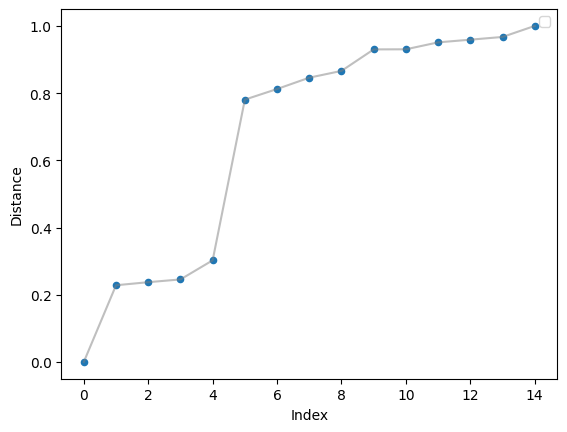

In [10]:
show_distances("Pes štěká na měsíc")

text,distance
Pes štěká na měsíc,0.000
Ένας σκύλος γαβγίζει στο φεγγάρι,0.056
Ein Hund bellt den Mond an,0.108
Un perro está ladrando a la luna,0.162
A dog is barking at the moon,0.353
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.591
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.636
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.723
Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂,0.773
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.807


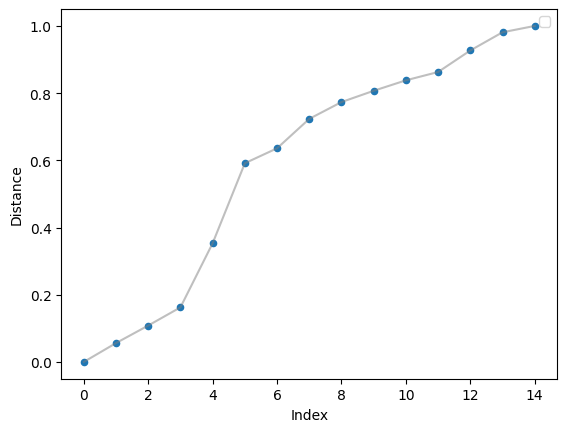

In [11]:
show_distances("Pes steka na mesic")

text,distance
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.000
My favorite book is 'Deep Sleep' by Raymond Chandler,0.132
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.140
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.143
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.175
Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂,0.774
Die chemische Formel für Koffein ist C₈H₁₀N₄O₂,0.796
La fórmula química de la cafeína es C₈H₁₀N₄O₂,0.806
Chemický vzorec pro kofein je C₈H₁₀N₄O₂,0.843
Ein Hund bellt den Mond an,0.857


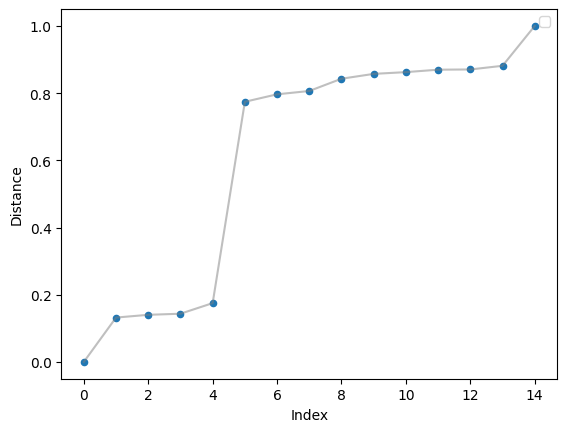

In [12]:
show_distances("My favorite book is …")

text,distance
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.000
My favorite book is 'Deep Sleep' by Raymond Chandler,0.109
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.121
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.133
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.184
Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂,0.800
La fórmula química de la cafeína es C₈H₁₀N₄O₂,0.829
Die chemische Formel für Koffein ist C₈H₁₀N₄O₂,0.831
Chemický vzorec pro kofein je C₈H₁₀N₄O₂,0.856
Ein Hund bellt den Mond an,0.859


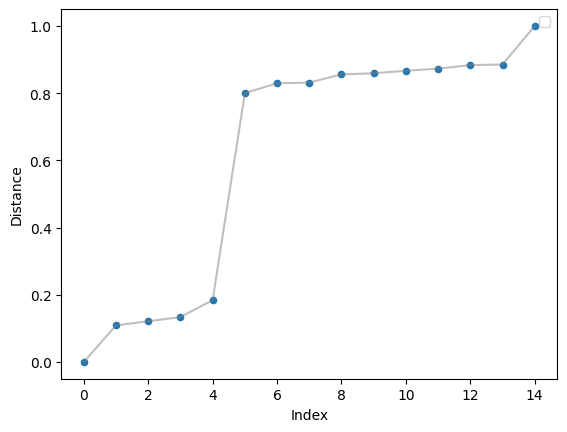

In [13]:
show_distances("Was ist mein Lieblingsbuch?")

text,distance
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.000
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.012
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.134
My favorite book is 'Deep Sleep' by Raymond Chandler,0.181
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.237
La fórmula química de la cafeína es C₈H₁₀N₄O₂,0.684
Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂,0.689
Die chemische Formel für Koffein ist C₈H₁₀N₄O₂,0.713
The chemical formula for caffeine is C₈H₁₀N₄O₂,0.756
Chemický vzorec pro kofein je C₈H₁₀N₄O₂,0.773


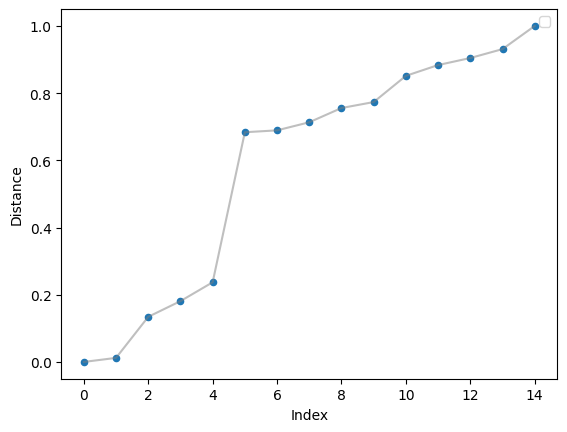

In [14]:
show_distances("A novel by Raymond Chandler")

text,distance
The chemical formula for caffeine is C₈H₁₀N₄O₂,0.000
Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂,0.083
Chemický vzorec pro kofein je C₈H₁₀N₄O₂,0.102
La fórmula química de la cafeína es C₈H₁₀N₄O₂,0.117
Die chemische Formel für Koffein ist C₈H₁₀N₄O₂,0.129
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.527
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.534
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.540
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.653
My favorite book is 'Deep Sleep' by Raymond Chandler,0.667


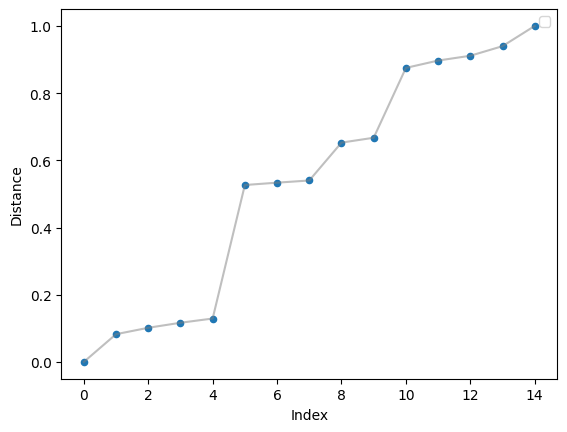

In [15]:
show_distances("What is caffeine?")

text,distance
Η χημική φόρμουλα της καφεΐνης είναι C₈H₁₀N₄O₂,0.000
The chemical formula for caffeine is C₈H₁₀N₄O₂,0.012
Chemický vzorec pro kofein je C₈H₁₀N₄O₂,0.046
Die chemische Formel für Koffein ist C₈H₁₀N₄O₂,0.054
La fórmula química de la cafeína es C₈H₁₀N₄O₂,0.065
Mou oblíbenou knihou je 'Hluboký spánek' od Raymonda Chandlera,0.501
Το αγαπημένο μου βιβλίο είναι το 'Ο Μεγάλος Ύπνος' του Ρέιμοντ Τσάντλερ,0.503
Mein Lieblingsbuch ist 'Tiefer Schlaf' von Raymond Chandler,0.522
Mi libro favorito es 'El sueño eterno' de Raymond Chandler,0.640
My favorite book is 'Deep Sleep' by Raymond Chandler,0.663


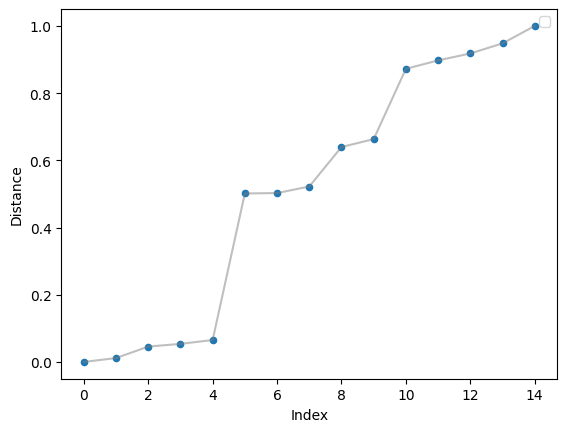

In [16]:
show_distances("Τι είναι η καφεΐνη;")